In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from ydata_profiling import ProfileReport

df = pd.read_csv('analysis_data.csv')
df.drop(columns=['Unnamed: 0'],axis= 1, inplace=True)
profile = ProfileReport(df, title="Profiling Report")
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
pd.set_option('display.max_row', None)

wdf = df.copy()
wdf.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,ApprovalDateYear,ChgOffDateYear,ApprovalDateMonth,DisbursementDateYear,UrbanRural_Encoded,Region,BankRegion,TermDays,LoanDateEnd,Reccession
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,1997,1970,2,1999,0,Eastern,Eastern,2520,2006-01-22,0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,1997,1970,2,1997,0,Eastern,Eastern,1800,2002-05-05,0


### Loan Performance by City

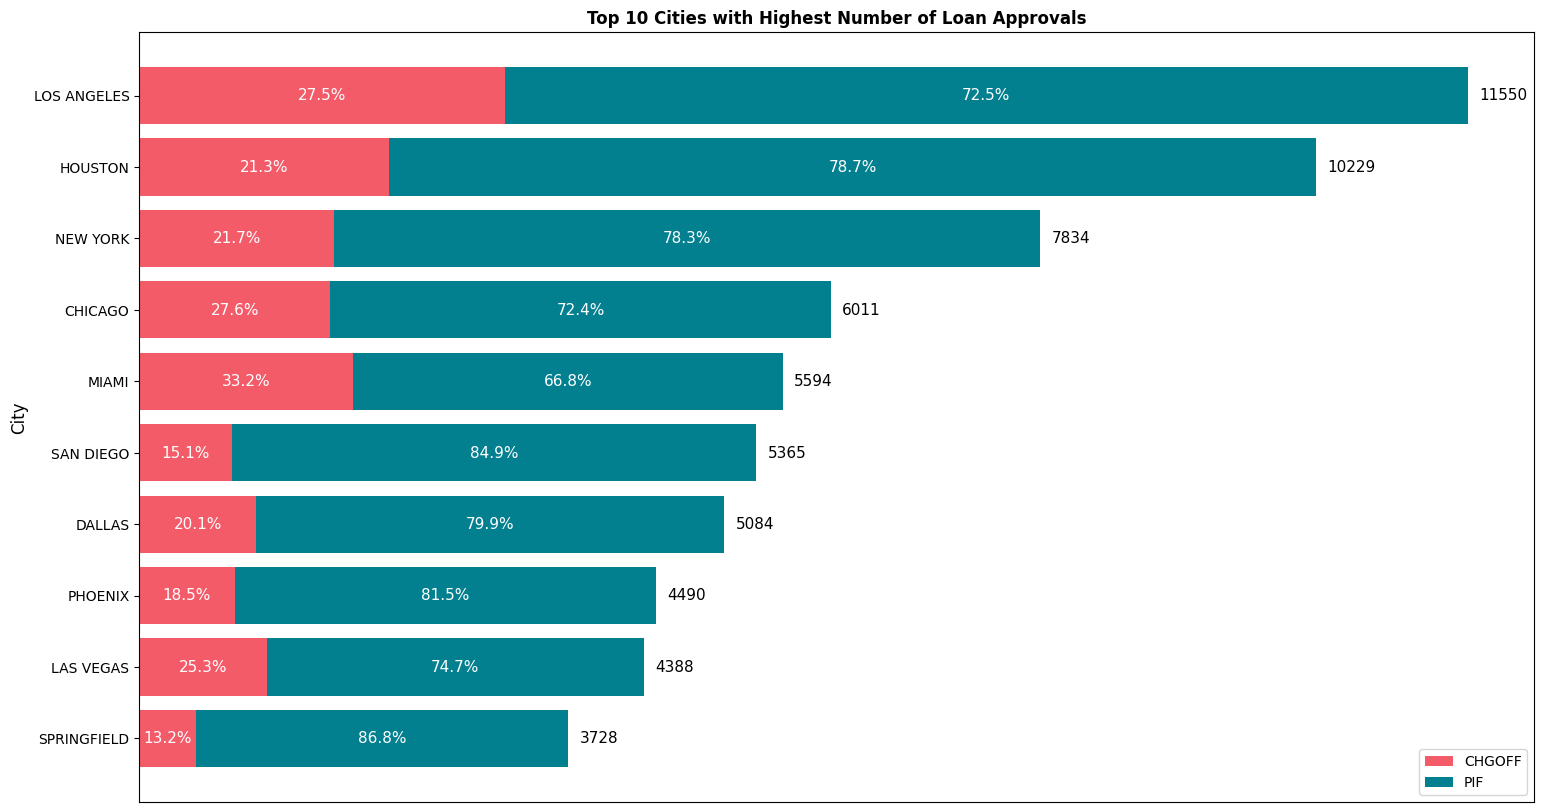

In [4]:
# Aggregate data by city and MIS_Status using size
selected_cities = df.groupby(['City', 'MIS_Status']).size().unstack(fill_value=0)

# Calculate the total count by city
selected_cities['Total'] = selected_cities.sum(axis=1)

# Sort the DataFrame by total count in descending order
selected_cities = selected_cities.sort_values(by='Total', ascending=False)

# Filter to include only the top 10 cities
selected_cities = selected_cities.head(10)

# Calculate the percentage of CHGOFF and PIF loans
selected_cities['CHGOFF_Percentage'] = (selected_cities['CHGOFF'] / selected_cities['Total']) * 100
selected_cities['PIF_Percentage'] = (selected_cities['PIF'] / selected_cities['Total']) * 100

# Define color palette
colors = ['#F45B69', '#028090']  # Colors for CHGOFF and PIF

# Plot
plt.figure(figsize=(18, 10))
bars1 = plt.barh(selected_cities.index, selected_cities['CHGOFF'], color=colors[0], label='CHGOFF')
bars2 = plt.barh(selected_cities.index, selected_cities['PIF'], left=selected_cities['CHGOFF'], color=colors[1], label='PIF')

plt.xlabel('')
plt.ylabel('City', fontsize=12)
plt.title('Top 10 Cities with Highest Number of Loan Approvals', fontweight='bold')
plt.gca().invert_yaxis()  # Reverse the y-axis

# Annotate bars with their percentages and total counts
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    total = selected_cities['Total'].iloc[i]
    chgoff_percentage = selected_cities['CHGOFF_Percentage'].iloc[i]
    pif_percentage = selected_cities['PIF_Percentage'].iloc[i]
    # Annotate CHGOFF percentage
    plt.text(bar1.get_width() / 2, bar1.get_y() + bar1.get_height() / 2, f'{chgoff_percentage:.1f}%', ha='center', va='center', fontsize=11, color='white')
    # Annotate PIF percentage
    plt.text(bar1.get_width() + bar2.get_width() / 2, bar2.get_y() + bar2.get_height() / 2, f'{pif_percentage:.1f}%', ha='center', va='center', fontsize=11, color='white')
    # Annotate total count
    plt.text(total + 100, bar1.get_y() + bar1.get_height() / 2, f'{int(total)}', va='center', fontsize=11)

# Add legend
plt.legend()

# Remove x-axis ticks
plt.xticks([])

# Show the plot
plt.show()

#### Which states have the highest number of loan approval? 

In [5]:
# Install nbformat
%pip install nbformat

# Aggregate data by state
state_data = wdf.groupby('State').agg(
    total_approvals=('State', 'size'),
    total_amount_approved=('GrAppv', 'sum')
).reset_index()

# Format the total_amount_approved column with dollar signs and commas
state_data['total_amount_approved'] = state_data['total_amount_approved'].apply(lambda x: f"${x:,.2f}")

# Create the choropleth map
fig = px.choropleth(
    state_data,
    locations='State',
    locationmode='USA-states',
    color='total_approvals',
    hover_name='State',
    hover_data={
        'total_amount_approved': True,
        'total_approvals': True,
        'State': False
        },
    color_continuous_scale='RdBu_r',
    scope='usa',
    labels={'total_approvals': 'Total Loan Approvals'}
)

# Update the layout
fig.update_layout(
    title_text='Total Loan Approvals by State',
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
        projection_type='albers usa',
    ),
    width=800,
    height=600,
    margin=dict(l=5, r=0, t=35, b=0)
)

# Show the map
fig.show()

Note: you may need to restart the kernel to use updated packages.


### Loan Performance by Region

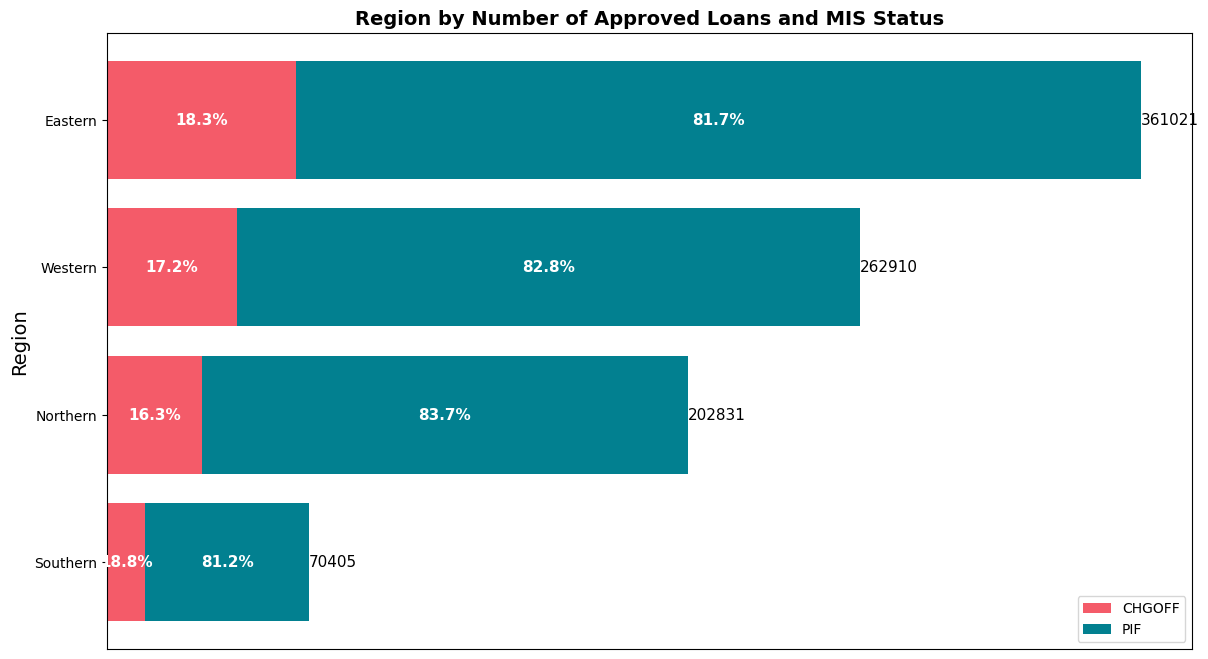

In [6]:
# Aggregate data by region and MIS_Status using size
regional_approval = df.groupby(['Region', 'MIS_Status']).size().unstack(fill_value=0)

# Sort the DataFrame by total count in descending order
regional_approval['Total'] = regional_approval.sum(axis=1)
regional_approval = regional_approval.sort_values(by='Total', ascending=False)

# Calculate the percentage of CHGOFF and PIF loans
regional_approval['CHGOFF_Percentage'] = (regional_approval['CHGOFF'] / regional_approval['Total']) * 100
regional_approval['PIF_Percentage'] = (regional_approval['PIF'] / regional_approval['Total']) * 100

# Define color palette
colors = ['#F45B69', '#028090']  # Colors for CHGOFF and PIF

# Plot
plt.figure(figsize=(14, 8))
bars1 = plt.barh(regional_approval.index, regional_approval['CHGOFF'], color=colors[0], label='CHGOFF')
bars2 = plt.barh(regional_approval.index, regional_approval['PIF'], left=regional_approval['CHGOFF'], color=colors[1], label='PIF')

plt.xlabel('')
plt.ylabel('Region', fontsize=14)
plt.yticks(fontsize=10)
plt.title('Region by Number of Approved Loans and MIS Status', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()  # Reverse the y-axis

# Annotate bars with their percentages and total counts
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    total = bar1.get_width() + bar2.get_width()
    chgoff_percentage = regional_approval['CHGOFF_Percentage'].iloc[i]
    pif_percentage = regional_approval['PIF_Percentage'].iloc[i]
    # Annotate CHGOFF percentage
    plt.text(bar1.get_width() / 2, bar1.get_y() + bar1.get_height() / 2, f'{chgoff_percentage:.1f}%', ha='center', va='center', fontsize=11, fontweight = 'bold', color='white')
    # Annotate PIF percentage
    plt.text(bar1.get_width() + bar2.get_width() / 2, bar2.get_y() + bar2.get_height() / 2, f'{pif_percentage:.1f}%', ha='center', va='center', fontweight = 'bold', fontsize=11, color='white')
    # Annotate total count
    plt.text(total + 100, bar1.get_y() + bar1.get_height() / 2, f'{int(total)}', va='center', fontsize=11)

# Add legend
plt.legend()

# Remove x-axis ticks
plt.xticks([])

# Show the plot
plt.show()

### Loan Performance by Industry

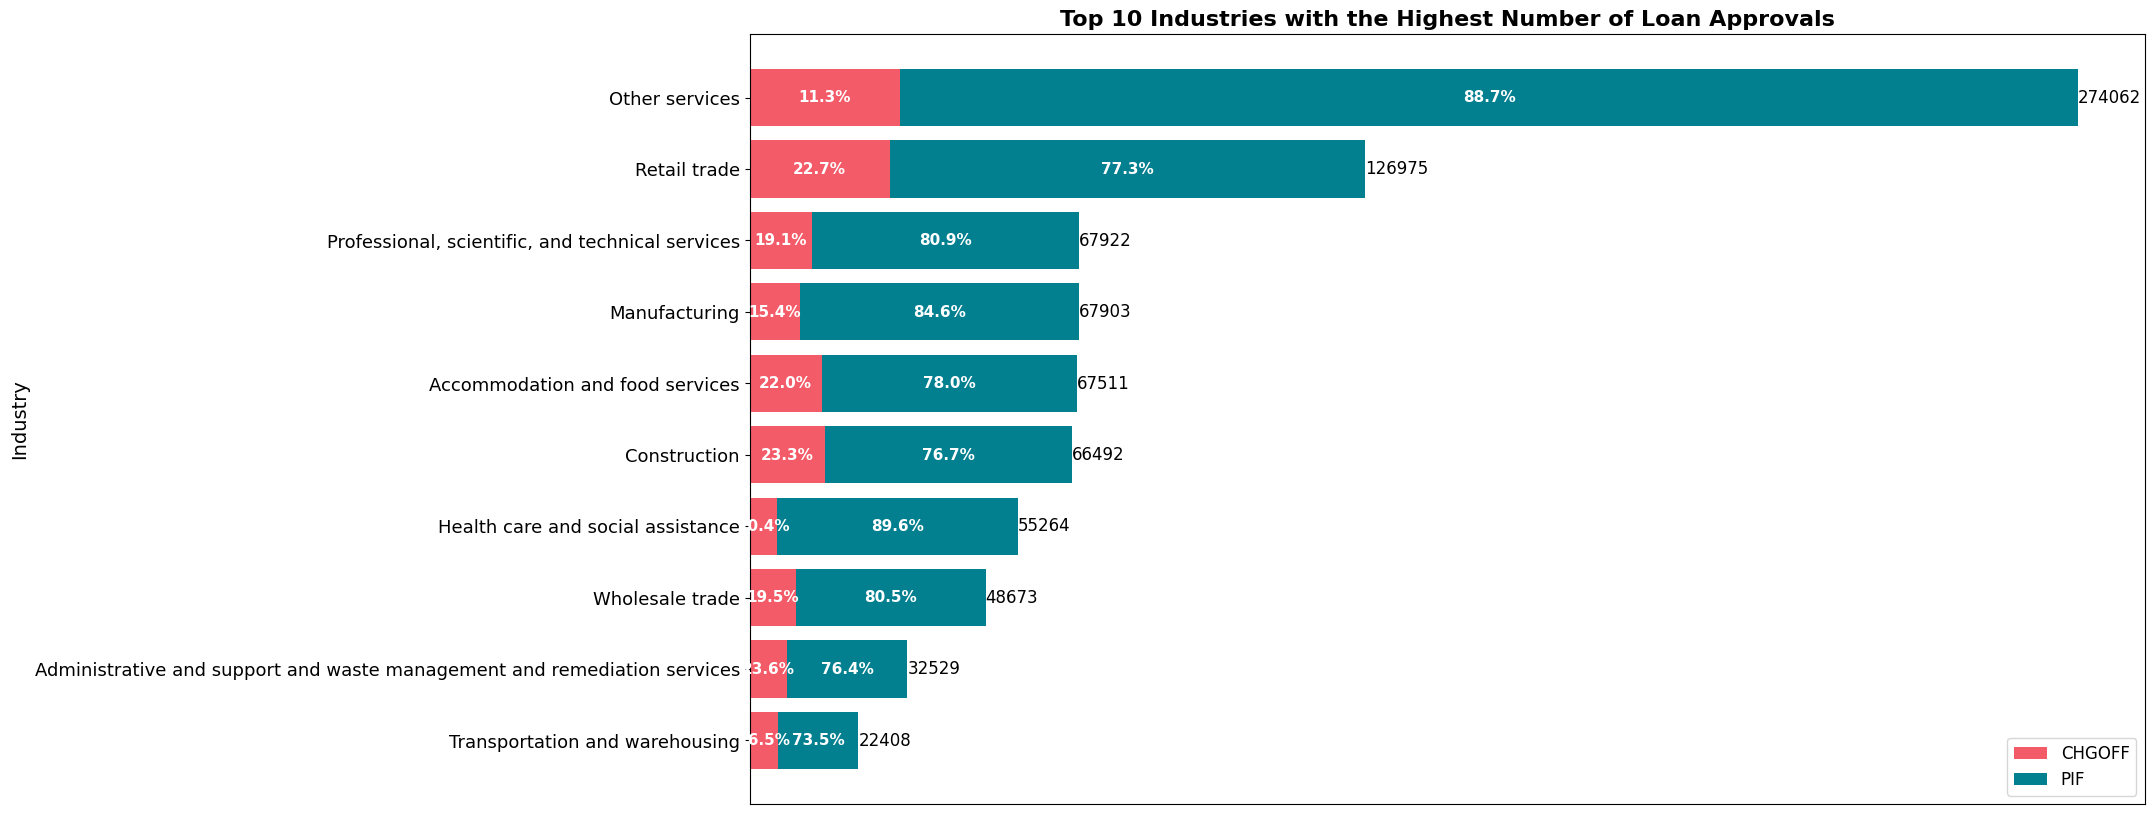

In [7]:
# Create industry_approval DataFrame based on the count of each industry
industry_approval = pd.DataFrame({'Count': df['Industry'].value_counts()}).reset_index()
industry_approval.columns = ['Industry', 'Total']

# Aggregate data by industry and MIS_Status using size
selected_industry_approval = df.groupby(['Industry', 'MIS_Status']).size().unstack(fill_value=0)

# Merge with industry_approval to maintain the order
selected_industry_approval = industry_approval.merge(selected_industry_approval, on='Industry', how='left').fillna(0)

# Filter to include only the top 10 industries
selected_industry_approval = selected_industry_approval.head(10)

# Calculate the percentage of CHGOFF and PIF loans
selected_industry_approval['CHGOFF_Percentage'] = (selected_industry_approval['CHGOFF'] / selected_industry_approval['Total']) * 100
selected_industry_approval['PIF_Percentage'] = (selected_industry_approval['PIF'] / selected_industry_approval['Total']) * 100

# Define color palette
colors = ['#F45B69', '#028090']  # Colors for CHGOFF and PIF

# Plot
plt.figure(figsize=(18, 10))
bars1 = plt.barh(selected_industry_approval['Industry'], selected_industry_approval['CHGOFF'], color=colors[0], label='CHGOFF')
bars2 = plt.barh(selected_industry_approval['Industry'], selected_industry_approval['PIF'], left=selected_industry_approval['CHGOFF'], color=colors[1], label='PIF')

plt.xlabel('')
plt.ylabel('Industry', fontsize=14)
plt.yticks(fontsize=13)
plt.title('Top 10 Industries with the Highest Number of Loan Approvals', fontweight='bold', fontsize=16)
plt.gca().invert_yaxis()  # Reverse the y-axis

# Annotate bars with their percentages and total counts
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    total = selected_industry_approval['Total'].iloc[i]
    chgoff_percentage = selected_industry_approval['CHGOFF_Percentage'].iloc[i]
    pif_percentage = selected_industry_approval['PIF_Percentage'].iloc[i]
    # Annotate CHGOFF percentage
    plt.text(bar1.get_width() / 2, bar1.get_y() + bar1.get_height() / 2, f'{chgoff_percentage:.1f}%', ha='center', va='center', fontsize=11, fontweight = 'bold', color='white')
    # Annotate PIF percentage
    plt.text(bar1.get_width() + bar2.get_width() / 2, bar2.get_y() + bar2.get_height() / 2, f'{pif_percentage:.1f}%', ha='center', va='center', fontsize=11, fontweight = 'bold', color='white')
    # Annotate total count
    plt.text(total + 0.5, bar1.get_y() + bar1.get_height() / 2, f'{int(total)}', va='center', fontsize=12)

# Add legend
plt.legend(fontsize = 12)

# Remove x-axis ticks
plt.xticks([])

# Show the plot
plt.show()

### TimeSeries of the Number of Loans Approved

In [28]:
# Create year_approval DataFrame
year_approval = pd.DataFrame({'Count': wdf['ApprovalFY'].value_counts()}).reset_index()
year_approval = year_approval.rename(columns={'index': 'ApprovalFY'})
year_approval['ApprovalFY'] = year_approval['ApprovalFY'].apply(lambda x: str(x))

# Create a complete list of years
all_years = pd.DataFrame({'ApprovalFY': [str(year) for year in np.arange(1966, 2014)]})

# Merge with existing DataFrame to include missing years
selected_year_approval = pd.merge(all_years, year_approval, on='ApprovalFY', how='left').fillna(0)

# Ensure 'Count' column is of integer type
selected_year_approval['Count'] = selected_year_approval['Count'].astype(int)

# Convert 'ApprovalFY' to a categorical variable with a specific order
selected_year_approval['ApprovalFY'] = pd.Categorical(selected_year_approval['ApprovalFY'], categories=sorted(selected_year_approval['ApprovalFY']), ordered=True)

# Sort the DataFrame by 'ApprovalFY' in ascending order
selected_year_approval = selected_year_approval.sort_values(by='ApprovalFY', ascending=True)

# Create interactive plot with Plotly
fig = px.line(selected_year_approval, x='ApprovalFY', y='Count', markers=True, title='TimeSeries of the Number of SBA Approved Loans')


# Customize the layout to remove grid lines and add borders on left and bottom
fig.update_layout(
    xaxis_title='ApprovalFY',
    yaxis_title='Number of Loan Approvals',
    xaxis=dict(
        tickmode='array',
        tickvals=selected_year_approval['ApprovalFY'],
        showgrid=False,
        showline=True,
        linecolor='black',
        linewidth=1
    ),
    yaxis=dict(
        tickformat=',',
        showgrid=False,
        showline=True,
        linecolor='black',
        linewidth=0.5
    ),
    title_font=dict(size=16, family='Arial Black'),
    hovermode='x unified',
    plot_bgcolor='white'  # Set background color to white
)

# Customize the layout to remove grid lines
# fig.update_layout(
#     xaxis_title='ApprovalFY',
#     yaxis_title='Number of Loan Approvals',
#     xaxis=dict(tickmode='array', tickvals=selected_year_approval['ApprovalFY'], showgrid=False),
#     yaxis=dict(tickformat=',', showgrid=False),
#     title_font=dict(size=16, family='Arial Black'),
#     hovermode='x unified',
#     plot_bgcolor='white'  # Set background color to white
# )

# Show the plot
fig.show()


#### Percentage of approved: LowDoc / Revolving Line Credit / Franchise / New or Existing Business

In [26]:
lowdoc_pie = wdf['LowDoc_Encoded'].map({1 : "LowDoc", 0: "Not LowDoc"})
franchise_pie = wdf['FranchiseCode_Encoded'].map({1 : "Franchise", 0: "Not Franchise"})
revline_pie = wdf['RevLineCr_Encoded'].map({1 : "Revolving Loan", 0: "Not Revolving"})
newexist_pie = wdf['NewExist_Encode'].map({1 : "New Business", 0: "Existing Business"})

df_pie = pd.DataFrame({'LowDoc_Encoded': lowdoc_pie,
                       'FranchiseCode_Encoded': franchise_pie,
                       'RevLineCr_Encoded': revline_pie, 
                       'NewExist_Encode':  newexist_pie})

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_8318/657301021.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ratio[column].fillna('Missing', inplace=True)
/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_8318/657301021.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

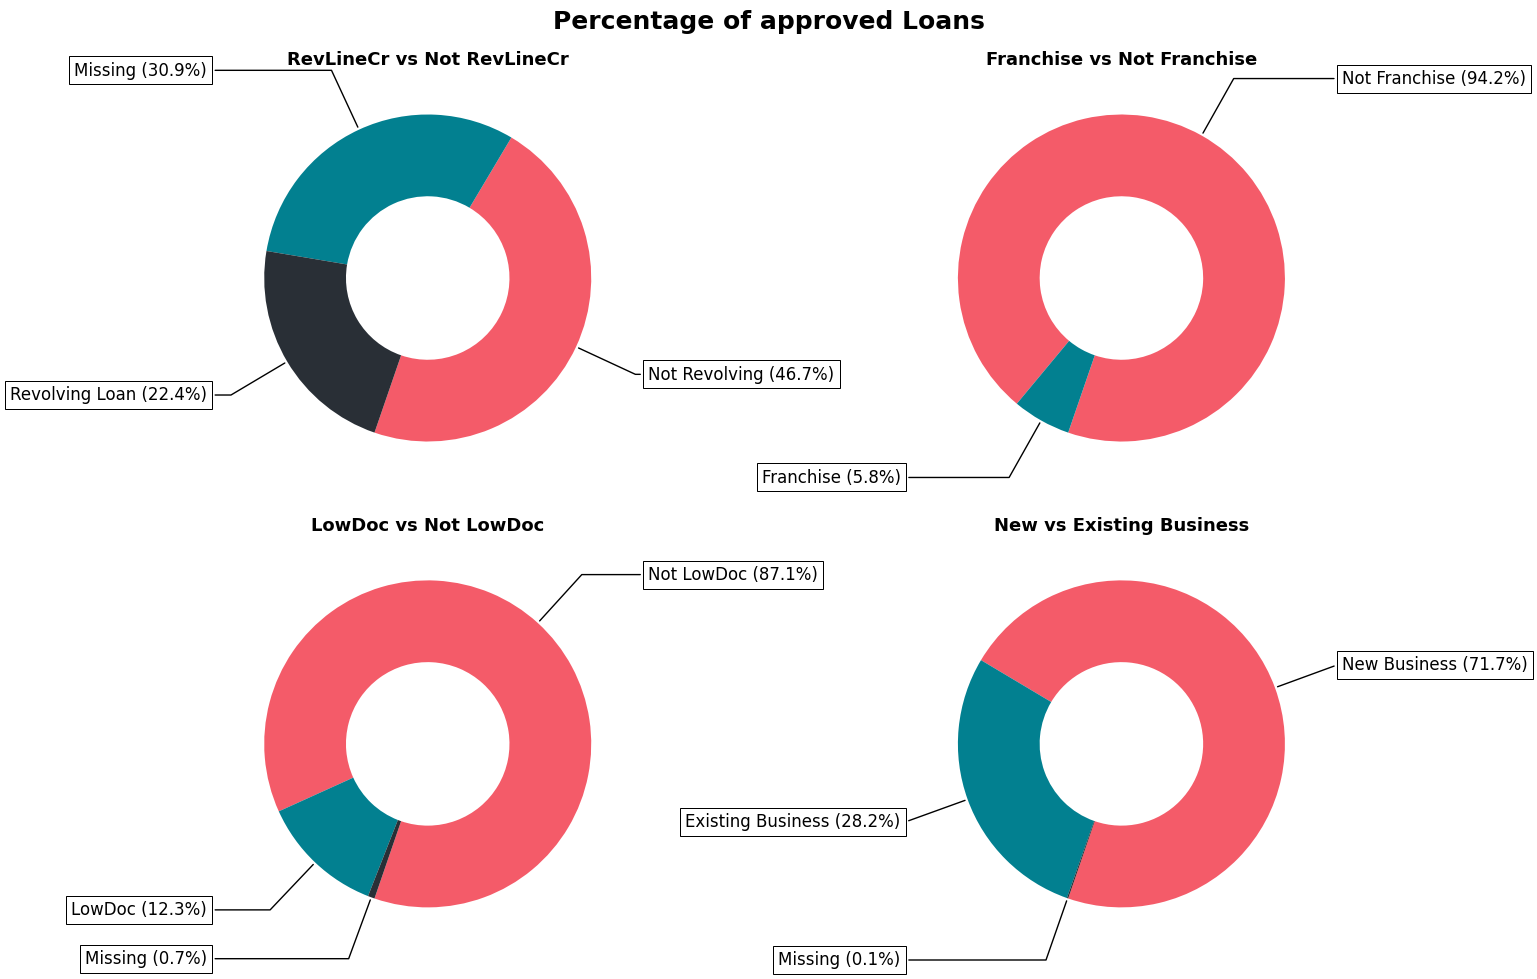

In [27]:
# Ensure interactive backend
%matplotlib inline

# Define a function to create pie charts
def create_pie_chart(ax, data, column, title, colors):
    ratio = data[column].value_counts(dropna=False).reset_index()
    ratio.columns = [column, 'count']
    ratio['Percentage'] = (ratio['count'] / ratio['count'].sum()) * 100

    # Check for missing data and fill with 'Missing' if any
    if ratio[column].isnull().any():
        ratio[column].fillna('Missing', inplace=True)
    
    wedges, texts = ax.pie(ratio['count'], wedgeprops=dict(width=0.5), startangle=-109, colors=colors)
    
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")
    
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        
        label = f"{ratio[column][i]} ({ratio['Percentage'][i]:.1f}%)"
        ax.annotate(
            label, fontsize = 12,
            xy=(x, y), 
            xytext=(1.35 * np.sign(x), 1.4 * y),
            horizontalalignment=horizontalalignment, 
            **kw
        )
    
    ax.set_title(title, fontsize=13, weight="bold")

# Define color palette
colors = ['#F45B69', '#028090', '#292F36'] # 292F36, (tl),F7FFF7, FF6B6B,

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), subplot_kw=dict(aspect="equal"))

# Create pie charts for each parameter
create_pie_chart(axs[0, 0], df_pie, 'RevLineCr_Encoded', 'RevLineCr vs Not RevLineCr', colors)
create_pie_chart(axs[0, 1], df_pie, 'FranchiseCode_Encoded', 'Franchise vs Not Franchise', colors)
create_pie_chart(axs[1, 0], df_pie, 'LowDoc_Encoded', 'LowDoc vs Not LowDoc', colors)
create_pie_chart(axs[1, 1], df_pie, 'NewExist_Encode', 'New vs Existing Business', colors)

# Add plot
plt.suptitle('Percentage of approved Loans', fontsize=18, fontweight= 'bold')

# Adjust layout
plt.tight_layout()
plt.show()

### Terms Approved by Region and Economic Active Period

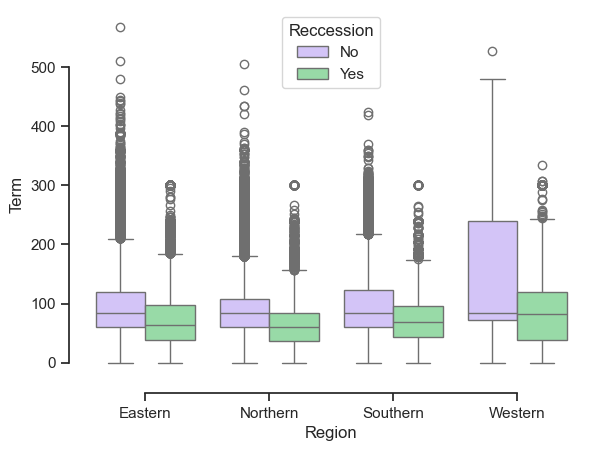

In [36]:
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Region", y="Term",
            hue="Reccession", palette=["m", "g"],
            data=wdf)
sns.despine(offset=10, trim=True)

### Loan Performance by Economic Impact (Recession)

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_15486/2386174944.py:19: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_15486/2386174944.py:20: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




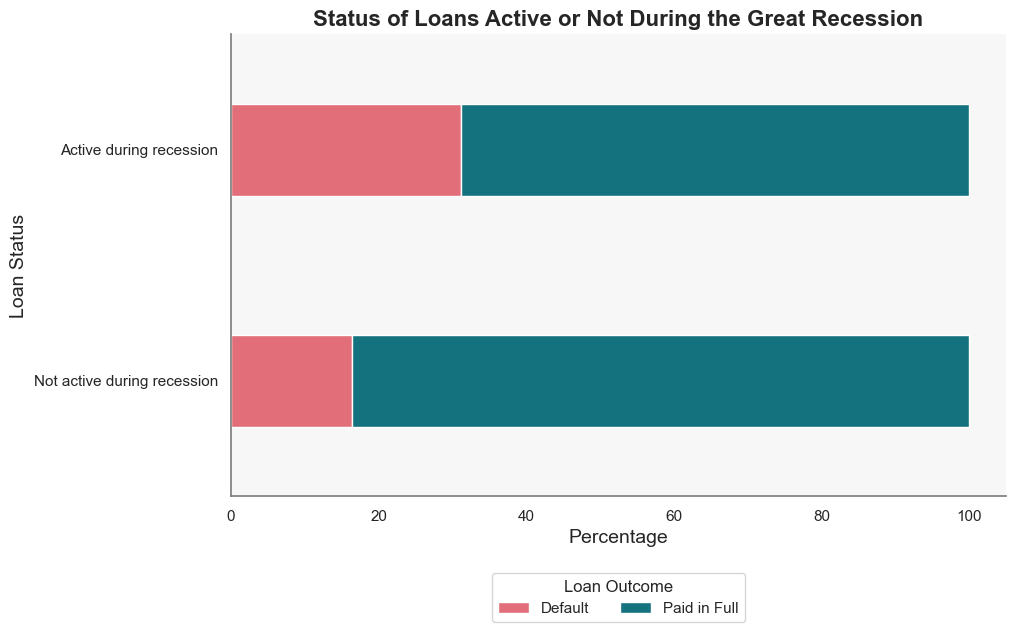

In [66]:

# Determine the status of loans during the recession
wdf['Status'] = np.where(wdf['Reccession'] == 1, 'Active during recession', 'Not active during recession')

# Aggregate data to calculate the percentages of CHGOFF and PIF
status_agg = wdf.groupby(['Status', 'MIS_Status']).size().reset_index(name='Count')
total_counts = wdf.groupby('Status').size().reset_index(name='Total')
status_agg = pd.merge(status_agg, total_counts, on='Status')
status_agg['Percentage'] = (status_agg['Count'] / status_agg['Total']) * 100

# Prepare data for plotting
plot_data = status_agg.pivot(index='Status', columns='MIS_Status', values='Percentage').reset_index()

# Set the theme
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.4
bar1 = sns.barplot(data=plot_data, x='CHGOFF', y='Status', color='#F45B69', label='Default', ci=None, width=bar_width)
bar2 = sns.barplot(data=plot_data, x='PIF', y='Status', color='#028090', label='Paid in Full', ci=None, width=bar_width, left=plot_data['CHGOFF'])

# Customize the plot
plt.xlabel('Percentage', fontsize=14)
plt.ylabel('Loan Status', fontsize=14)
plt.title('Status of Loans Active or Not During the Great Recession', fontsize=16, fontweight='bold')

# Remove grid lines
plt.grid(False)

# Add a light grey background
plt.gca().set_facecolor('#f7f7f7')

# Add a border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

# Place the legend below the plot
plt.legend(title='Loan Outcome', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)

# Show the plot
plt.show()

### Loan Amount and Job Creation / Retained Jobs

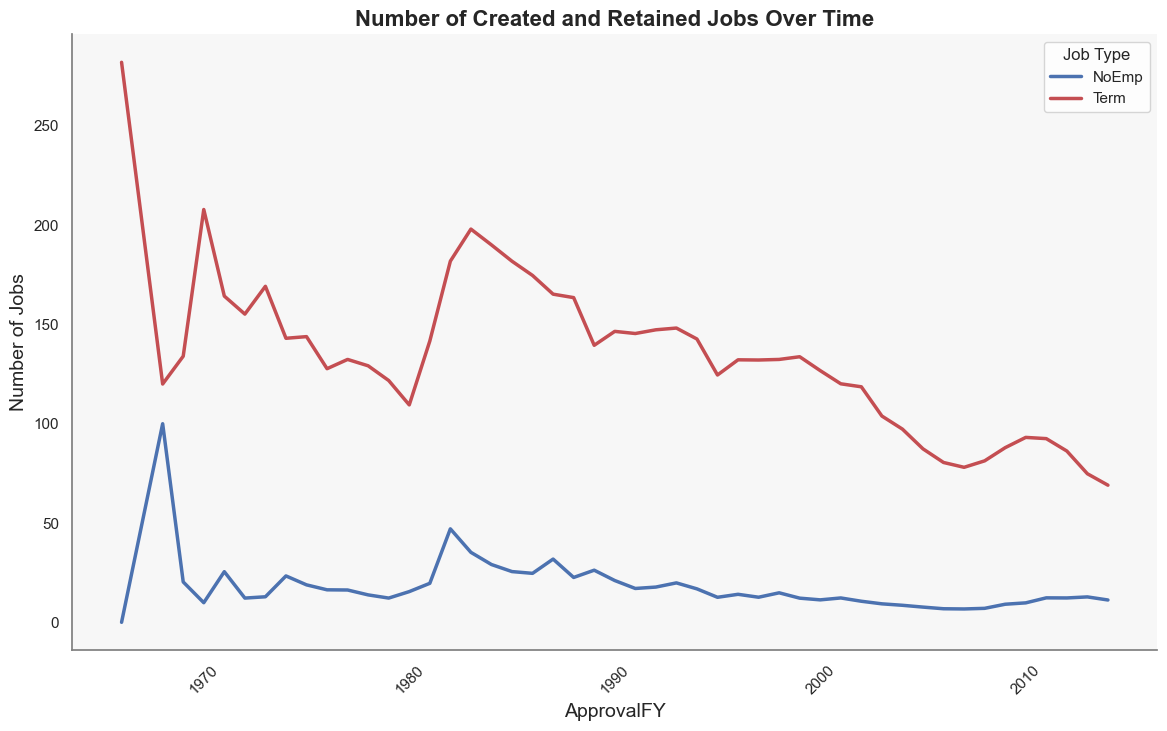

In [39]:
# Set the theme
sns.set_theme(style="white")

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=wdf, x='ApprovalFY', y='NoEmp', label='NoEmp', linewidth=2.5, color='b', errorbar=None)
sns.lineplot(data=wdf, x='ApprovalFY', y='Term', label='Term', linewidth=2.5, color='r', errorbar=None)

# Customize the plot
plt.xlabel('ApprovalFY', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.title('Number of Created and Retained Jobs Over Time', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Job Type')

# Remove grid lines
plt.grid(False)

# Add a light grey background
plt.gca().set_facecolor('#f7f7f7')

# Add a border around the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

# Show the plot
plt.show()